In [24]:
using Pkg
Pkg.add("Plots")
using Plots

 Resolving package versions...
  Updating `~/.julia/environments/v0.7/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v0.7/Manifest.toml`
 [no changes]


In [36]:
@fastmath function SIR_fs(N,bet,gamm)
    final_size = zeros(N+1,1);
    final_size[2] = 1;
    for Z2 in 0:N
        @inbounds for Z1 in Z2+1:N-1
            p1 = 1 / ( 1 + gamm/(bet*(N-Z1)));
            final_size[Z1+2] = final_size[Z1+2] + final_size[Z1+1]*p1; 
            final_size[Z1+1] = final_size[Z1+1]*(1-p1);
        end
    end
    return final_size;
end

SIR_fs (generic function with 1 method)

In [33]:
N = 20;                       
bet = 2/(N-1);
gamm = 1.0;

In [35]:
final_size = SIR_fs(N,bet,gamm);

In [37]:
@time final_size = SIR_fs(N,bet,gamm);

  0.021072 seconds (49.40 k allocations: 2.558 MiB)


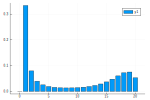

In [38]:
bar(0:N,final_size)

In [88]:
@fastmath function SI4R_fs(N::Int64,bet::Float64,gamm::Float64)
    Psi = (N+1)*(N+2)*(N+3)*(N+4)/24;
#     final_size = zeros(convert(Float64, (N+1,1)))
    #final_size = zeros(N+1,1);
    p_vec = zeros(Psi,1);
    p_vec[2]=1;
    @inbounds for Z5 in 0:N
        w::Int64 = Psi - (N-Z5+1)*(N-Z5+2)*(N-Z5+3)*(N-Z5+4)/24 + 1; 
        @inbounds for Z4 in Z5:N
            a5 = 4*gamm*(Z4-Z5);
            @inbounds for Z3 in Z4:N
                a4 = 4*gamm*(Z3-Z4);
                @inbounds for Z2 in Z3:N;
                    a3 = 4*gamm*(Z2-Z3);            
                    @inbounds for Z1 in Z2:N
                    a1 = bet*(N-Z1)*(Z1-Z5);   
                    a2 = 4*gamm*(Z1-Z2);
                    tot = a1+a2+a3+a4+a5;
                    if Z1-Z5 == 0
                        final_size[Z5+1] = p_vec[w];
                    end
                    if a1 > 0
                       p_vec[w+1] = p_vec[w+1]+ p_vec[w]*a1/tot;
                    end
                    if a2 > 0
                        p_vec[w+N-Z2] = p_vec[w+N-Z2]+ p_vec[w]*a2/tot;
                    end
                    if a3 > 0
                        place3::Int64 = (N-Z3)*(N-Z3+1)/2;
                        p_vec[w+place3] = p_vec[w+place3]+ p_vec[w]*a3/tot;
                    end
                    if a4 > 0
                        place4::Int64 = (N-Z4)*(N-Z4+1)*(N-Z4+2)/6; 
                        p_vec[w+place4] = p_vec[w+place4] + p_vec[w]*a4/tot;
                    end
                    if a5 > 0
                        p_vec[w] = p_vec[w]*a5/tot;
                    end
                    w = w + 1;
                end
            end
        end
    end
end
    return final_size
end


┌ Warning: Deprecated syntax `assignment inside [ ]`.
└ @ nothing none:0


SI4R_fs (generic function with 1 method)

In [89]:
final_size = SI4R_fs(N,bet,gamm);


┌ Warning: `zeros(dims...)` is deprecated, use `zeros(convert(Dims, dims)...)` instead.
│   caller = SI4R_fs(::Int64, ::Float64, ::Float64) at In[88]:3
└ @ Main ./In[88]:3


MethodError: MethodError: Cannot `convert` an object of type Array{DataType,1} to an object of type Int64
Closest candidates are:
  convert(::Type{T<:Number}, !Matched::T<:Number) where T<:Number at number.jl:6
  convert(::Type{T<:Number}, !Matched::Number) where T<:Number at number.jl:7
  convert(::Type{T<:Integer}, !Matched::Ptr) where T<:Integer at pointer.jl:23
  ...

In [75]:
@time final_size = SI4R_fs(N,bet,gamm);


  0.001253 seconds (83 allocations: 94.516 KiB)


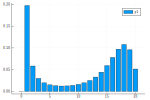

In [76]:
bar(0:N,final_size)